part 1


In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
test_images_1d.shape

(10000, 784)

In [14]:
model_p1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = 'SGD'

In [16]:
model_p1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
model_p1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
epochs = 20
# learning rate change and batch size change
history_p1_20 = model_p1.fit(train_images_1d, train_labels, epochs=epochs, validation_data=(test_images_1d, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 2ms/step - loss: 0.7844 - accuracy: 0.8131 - val_loss: 0.4821 - val_accuracy: 0.8810
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4577 - accuracy: 0.8809 - val_loss: 0.4019 - val_accuracy: 0.8956
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4044 - accuracy: 0.8913 - val_loss: 0.3687 - val_accuracy: 0.9008
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8973 - val_loss: 0.3495 - val_accuracy: 0.9066
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3607 - accuracy: 0.9007 - val_loss: 0.3375 - val_accuracy: 0.9097
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.9038 - val_loss: 0.3273 - val_accuracy: 0.9122
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.9058 - val_loss: 0.3202 - val_accuracy: 0.9135
Epo

In [19]:
#accuracy
history_20 = history_p1_20.history['val_accuracy']

here we are plotting the weighs for the 20th layer and as you can see the edges are not that well defined and because of trining it will be see its quite visible in 200th layer


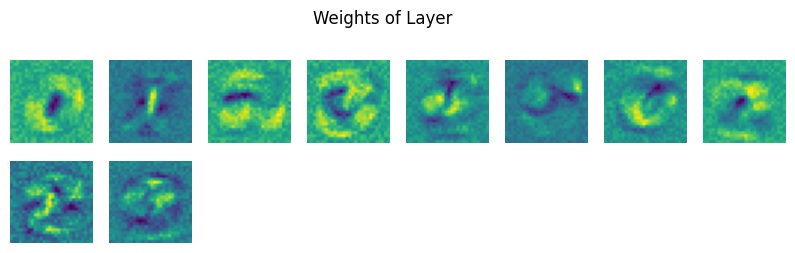

In [20]:
weights = model_p1.get_weights()[0]
model_p1.save_weights('/content/sample_data/ttemp/my_checkpoints')
# Plot the weights as images (assuming they are 2D)
plt.figure(figsize=(10, 5))
for i in range(weights.shape[1]):
    plt.subplot(4, 8, i + 1)  # Change the dimensions as needed
    plt.imshow(weights[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle(f'Weights of Layer ')
plt.show()

In [21]:
model_p1.load_weights('/content/sample_data/ttemp/my_checkpoints')

In [22]:
epochs =180
history_180 = model_p1.fit(train_images_1d, train_labels, epochs=epochs, validation_data=(test_images_1d, test_labels))

Epoch 1/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9185 - val_loss: 0.2877 - val_accuracy: 0.9199
Epoch 2/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.9189 - val_loss: 0.2860 - val_accuracy: 0.9202
Epoch 3/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.9192 - val_loss: 0.2854 - val_accuracy: 0.9203
Epoch 4/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2897 - accuracy: 0.9192 - val_loss: 0.2842 - val_accuracy: 0.9206
Epoch 5/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.9202 - val_loss: 0.2835 - val_accuracy: 0.9206
Epoch 6/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.9202 - val_loss: 0.2828 - val_accuracy: 0.9213
Epoch 7/180
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2862 - accuracy: 0.9207 - val_loss: 0.2822 - val_ac

In [23]:
weights_lay2 = model_p1.get_weights()[0]

In [24]:
history_180 = history_180.history['val_accuracy']

In [25]:
history_20.extend(history_180)

In [26]:
b=range(1,200)

In [27]:
epoch=[]
for i in range(1, 201):
    epoch.append(i)

In [28]:
import pandas as pd
df = pd.DataFrame({'epoch': epoch, 'acc': history_20})
df.head()

,epoch,acc
0,1,0.8810
1,2,0.8956
2,3,0.9008
3,4,0.9066
4,5,0.9097


herer you can see the edges are quite visible in this and these are the weights after 200th layer

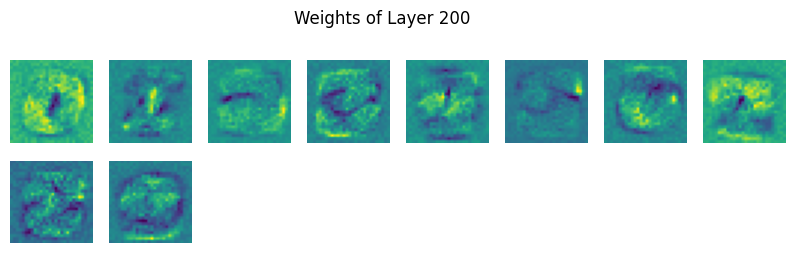

In [29]:
weights2 = model_p1.get_weights()[0]
# Plot the weights as images (assuming they are 2D)
plt.figure(figsize=(10, 5))
for i in range(weights2.shape[1]):
    plt.subplot(4, 8, i + 1)  # Change the dimensions as needed
    plt.imshow(weights2[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
plt.suptitle(f'Weights of Layer 200 ')
plt.show()

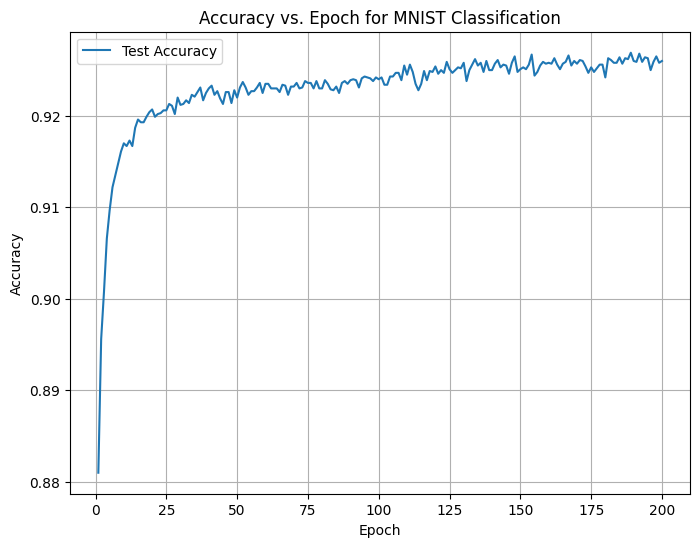

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(df['epoch'], df['acc'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch for MNIST Classification')
plt.legend()
plt.grid()
plt.show()

part 2

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
test_images_1d.shape

(10000, 784)

In [37]:
def trail_intital():
  return tf.keras.initializers.RandomNormal(mean=0.0, stddev=.1)


In [38]:
# Defining the autoencoder architecture
naive_autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(100, activation="sigmoid",kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=.1)),
    tf.keras.layers.Dense(784, activation="sigmoid",kernel_initializer= tf.keras.initializers.RandomNormal(mean=0.0, stddev=.1)),
])
naive_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.2)
# Compile the autoencoder
naive_autoencoder.compile(optimizer=sgd_optimizer,
                          loss="mse",
                          metrics=['accuracy'])

In [40]:
# Training the autoencoder
naive_autoencoder_history = naive_autoencoder.fit(
    train_images_1d,
    train_images_1d,
    epochs=200,
    batch_size=128,
    validation_data=(test_images_1d, test_images_1d))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.0082 - val_loss: 0.0714 - val_accuracy: 0.0120
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.0095 - val_loss: 0.0683 - val_accuracy: 0.0128
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.0099 - val_loss: 0.0671 - val_accuracy: 0.0129
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.0103 - val_loss: 0.0661 - val_accuracy: 0.0149
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.0106 - val_loss: 0.0649 - val_accuracy: 0.0140
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.0111 - val_loss: 0.0636 - val_accuracy: 0.0135
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.0114 - val_loss: 0.0622 - val_accuracy: 0.0128

here we are plotting the weights of the bottleneck layer with no sparsity constraint


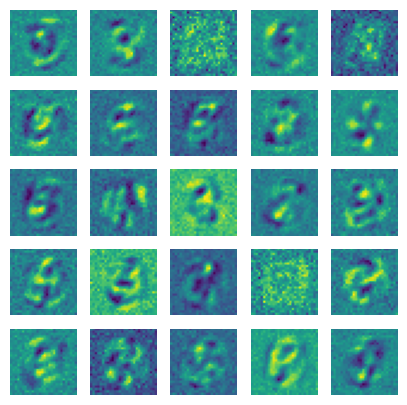

In [235]:
naive_autoencoder_last_layer_weights_reshaped = naive_autoencoder.layers[1].get_weights()[0].reshape(10, 10, 28, 28)
naive_autoencoder_last_layer_weights_reshaped
plt.figure(figsize=(5, 5))
for i in range(5):
    for j in range(5):
        ax = plt.subplot(5, 5, i * 5 + j + 1)
        plt.imshow(naive_autoencoder_last_layer_weights_reshaped[i, j], cmap='viridis')
        plt.axis('off')

plt.show()


In [42]:
temp_output = naive_autoencoder.predict(test_images_1d[0:25])

1/1 [==============================] - 0s 77ms/step


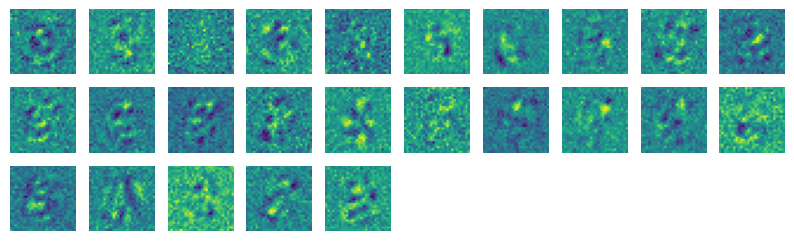

In [158]:
weights_encoder = naive_autoencoder.get_layer('dense_2').get_weights()[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(10, 10, i + 1)
    weight_matrix = weights_encoder[:, i].reshape(28, 28)
    plt.imshow(weight_matrix, cmap='viridis')
    plt.axis('off')

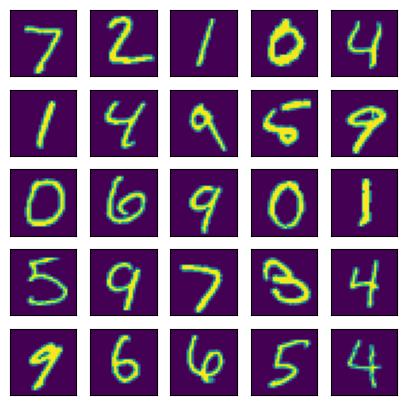

In [234]:

plt.figure(figsize=(5, 5))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_1d[i].reshape(28, 28), cmap="viridis")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

here we are displaying the predicted output from the autoencoder ans as you can see the most part are not visible clearly but the reconstruction is still pretty visible

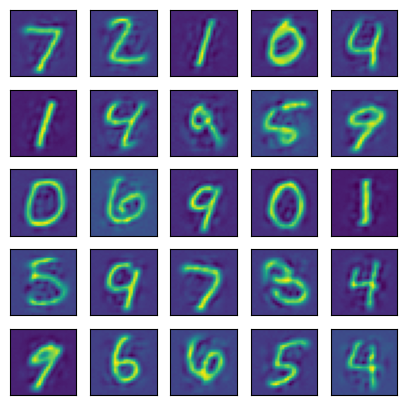

In [236]:
plt.figure(figsize=(5, 5))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(temp_output[i].reshape(28, 28), cmap="viridis")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

here we can see the activation matrix of the model by extracting the layers from the model and predicting test images on REF: office hours
and you can see that a lot of neurons are firing and thats not good

5/5 [==============================] - 0s 2ms/step
Shape of hidden_activations_matrix = (150, 100)


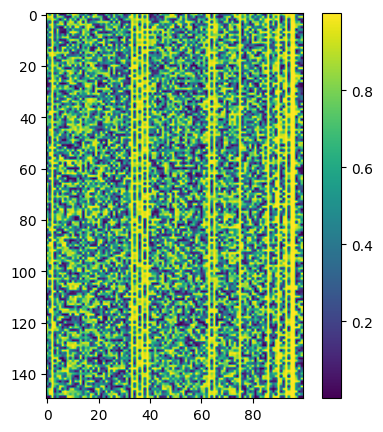

In [237]:
hidden_activations_matrix = tf.keras.Sequential(naive_autoencoder.layers[:1]).predict(train_images_1d[:150])
plt.figure(figsize=(5, 5))
plt.imshow(hidden_activations_matrix, cmap='viridis')
plt.colorbar()
plt.show()

In [46]:
naive_encoder_model = tf.keras.Sequential(naive_autoencoder.layers[:2])
for layer in naive_encoder_model.layers[:2]:
    layer.trainable = False


In [47]:
naive_autoencoder_softmax = tf.keras.models.Sequential([
    naive_encoder_model,
    tf.keras.layers.Dense(10, activation="softmax")  # New softmax layer with 10 classes (adjust as needed)
])

# Set the first two layers as non-trainable


In [48]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01)

In [49]:
naive_autoencoder_softmax.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [50]:
epochs = 200
# learning rate change and batch size change
naive_autoencoder_softmax_history = naive_autoencoder_softmax.fit(train_images_1d, train_labels, epochs=epochs, validation_data=(test_images_1d, test_labels))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 5s 2ms/step - loss: 0.8777 - accuracy: 0.7958 - val_loss: 0.5632 - val_accuracy: 0.8538
Epoch 2/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5365 - accuracy: 0.8546 - val_loss: 0.4733 - val_accuracy: 0.8709
Epoch 3/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4793 - accuracy: 0.8646 - val_loss: 0.4369 - val_accuracy: 0.8756
Epoch 4/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4513 - accuracy: 0.8702 - val_loss: 0.4167 - val_accuracy: 0.8810
Epoch 5/200
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4339 - accuracy: 0.8735 - val_loss: 0.4017 - val_accuracy: 0.8855
Epoch 6/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4214 - accuracy: 0.8770 - val_loss: 0.3915 - val_accuracy: 0.8851
Epoch 7/200
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4117 - accuracy: 0.8794 - val_loss: 0.3840 - val_accuracy: 0.88

here as you can see the plot is for accuracy vs epoch for the naive autoencoder with softmax layer at the end and the weights of the autoencoder are frozen in this


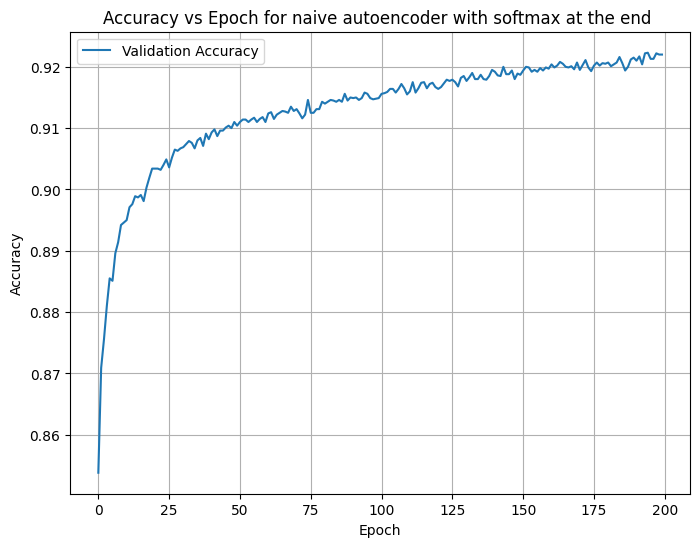

In [238]:
plt.figure(figsize=(8, 6))
plt.plot(naive_autoencoder_softmax_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch for naive autoencoder with softmax at the end ')
plt.legend()
plt.grid()
plt.show()

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [54]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [56]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [140]:
#ref:https://github.com/sudharsan13296/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/10.%20Reconsturcting%20Inputs%20using%20Autoencoders/10.09%20Building%20the%20Sparse%20Autoencoder.ipynb
def kl_divergence(enc_output):
  # epsilon = 1e-3
  rho=0.2
  rho_hat = tf.reduce_mean(enc_output,axis=0)
  # rho_hat = tf.clip_by_value(rho_hat, epsilon, 1.0 - epsilon)
  a = rho*tf.math.log(rho/rho_hat) + (1-rho)*tf.math.log((1-rho)/(1-rho_hat))
  # print(b)
  sum_kl = tf.reduce_sum(a)
  # rho * tf.math.log(rho / rho_hat) + (1 - rho) * tf.math.log((1 - rho) / (1 - rho_hat))
  # print(z)
  # return tf.reduce_sum(rho * tf.math.log(rho / rho_hat) + (1 - rho) * tf.math.log((1 - rho) / (1 - rho_hat)))
  return 0.5*(sum_kl)


In [141]:
sparse_autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(100, activation="sigmoid",activity_regularizer = kl_divergence),
    tf.keras.layers.Dense(784)
])
sparse_autoencoder.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               78500     
                                                                 
 dense_26 (Dense)            (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


tf.Tensor(0.0, shape=(), dtype=float32)


tried using a function for custom loss but it was on no use as all the neurons were firing

In [111]:
# def call(ytrue,ypred):
#         y_true = tf.math.l2_normalize(ytrue, axis=-1)
#         y_pred = tf.math.l2_normalize(ypred, axis=-1)
#         rho_hat = tf.reduce_mean(sparse_autoencoder(ytrue), axis=0)
#         rho=0.07
#         # print(f'rho{rho}')
#         # print(f'rho_hat{rho_hat}')
#         total_loss = tf.reduce_mean(tf.square(ytrue-ypred)) + 2.25 * kl_divergence(rho,rho_hat)
#         return total_loss

In [112]:
# tf.keras.losses.call = call  # enable use of loss with keras
# print(tf.keras.losses.call)

<function call at 0x7cb251963a30>


In [142]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.9)

In [143]:
sparse_autoencoder.compile(optimizer=sgd_optimizer,
              loss='mse',
              metrics=['accuracy'])

In [145]:
epochs = 1000
# learning rate change and batch size change
sparse_autoencoder_history = sparse_autoencoder.fit(train_images_1d,

                                                    train_images_1d,
                                                    epochs=epochs,
                                                    batch_size = 512,
                                                    validation_data=(test_images_1d, test_images_1d))

Epoch 1/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.0130 - val_loss: 0.0635 - val_accuracy: 0.0118
Epoch 2/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.0131 - val_loss: 0.0616 - val_accuracy: 0.0121
Epoch 3/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0604 - accuracy: 0.0131 - val_loss: 0.0598 - val_accuracy: 0.0123
Epoch 4/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.0133 - val_loss: 0.0579 - val_accuracy: 0.0121
Epoch 5/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0568 - accuracy: 0.0133 - val_loss: 0.0562 - val_accuracy: 0.0125
Epoch 6/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0552 - accuracy: 0.0131 - val_loss: 0.0546 - val_accuracy: 0.0124
Epoch 7/1000
118/118 [==============================] - 1s 4ms/step - loss: 0.0537 - accuracy: 0.0129 - val_loss: 0.0531 - val_accuracy:

In [146]:
temp_output = sparse_autoencoder.predict(test_images_1d[0:25])

1/1 [==============================] - 0s 67ms/step


weights visualization for the sparse autoencoder

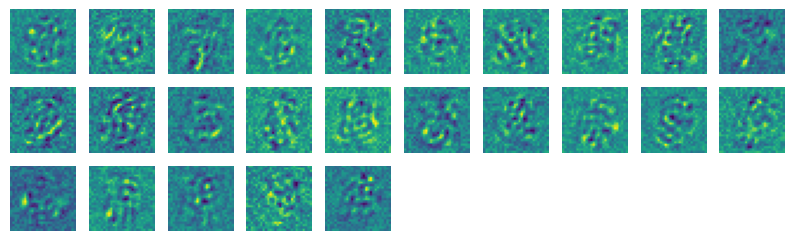

In [239]:
weights_encoder = sparse_autoencoder.get_layer('dense_25').get_weights()[0]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(10, 10, i + 1)
    plt.imshow(weights_encoder[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')


orginal image


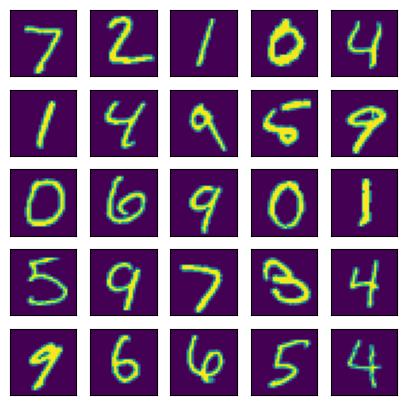

In [240]:

plt.figure(figsize=(5, 5))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_1d[i].reshape(28, 28), cmap="viridis")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

sparse autoencoder generated images

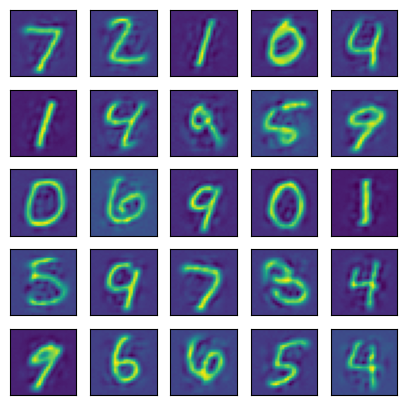

In [241]:

plt.figure(figsize=(5, 5))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(temp_output[i].reshape(28, 28), cmap="viridis")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

here we can see the activation matrix of the model by extracting the layers from the model and predicting test images on REF: office hours
and you can see that a lot of neurons are not  firing and thats a good thing

5/5 [==============================] - 0s 2ms/step
Shape of hidden_activations_matrix = (150, 100)

Encoder output Heatmap for 150 images



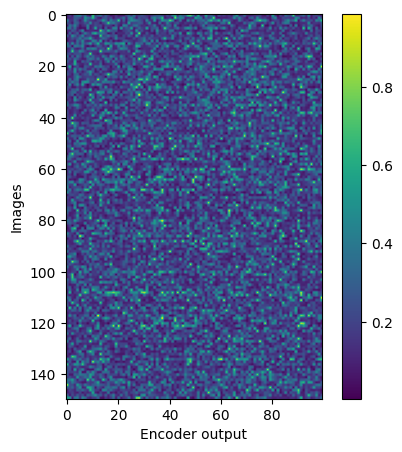

In [149]:
hidden_activations_matrix = tf.keras.Sequential(sparse_autoencoder.layers[:1]).predict(train_images_1d[:150])
plt.figure(figsize=(5, 5))
plt.imshow(hidden_activations_matrix, cmap='viridis')
plt.colorbar()
plt.show()

In [172]:
sparse_encoder_model = tf.keras.Sequential(sparse_autoencoder.layers[:2])
for layer in sparse_autoencoder.layers[:2]:
    layer.trainable = False


In [173]:
sparse_autoencoder_softmax = tf.keras.models.Sequential([
    sparse_encoder_model,
    tf.keras.layers.Dense(10, activation="softmax")
])

In [174]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.6)

In [175]:
sparse_autoencoder_softmax.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [176]:
epochs = 200
sparse_autoencoder_softmax_history = sparse_autoencoder_softmax.fit(train_images_1d, train_labels, epochs=epochs,batch_size=128, validation_data=(test_images_1d, test_labels))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.4090 - accuracy: 0.8799 - val_loss: 0.3151 - val_accuracy: 0.9081
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.9068 - val_loss: 0.3128 - val_accuracy: 0.9088
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3141 - accuracy: 0.9091 - val_loss: 0.2930 - val_accuracy: 0.9145
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.9100 - val_loss: 0.2928 - val_accuracy: 0.9145
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3064 - accuracy: 0.9129 - val_loss: 0.3072 - val_accuracy: 0.9087
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3044 - accuracy: 0.9125 - val_loss: 0.2918 - val_accuracy: 0.9145
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9124 - val_loss: 0.2948 - val_accuracy: 0.9136

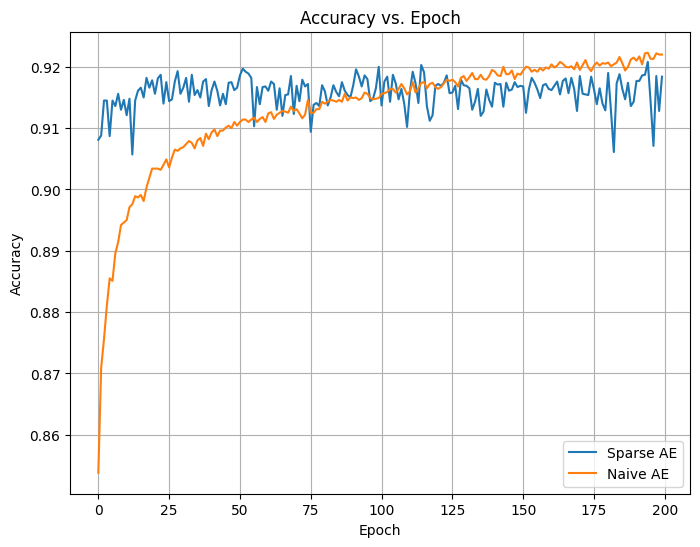

In [243]:
plt.figure(figsize=(8, 6))
plt.plot(sparse_autoencoder_softmax_history.history['val_accuracy'], label='Sparse AE')
plt.plot(naive_autoencoder_softmax_history.history['val_accuracy'], label='Naive AE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

part3


In [178]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [179]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [180]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [181]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [182]:
train_images.shape

(60000, 28, 28)

In [183]:
test_images_1d.shape

(10000, 784)

In [184]:
model_p3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [185]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = 'SGD'

In [186]:
model_p3.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [187]:
model_p3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 100)               78500     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
epochs = 200
# learning rate change and batch size change
history_p3 = model_p3.fit(train_images_1d, train_labels, epochs=epochs,batch_size =128, validation_data=(test_images_1d, test_labels))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 2.0533 - accuracy: 0.4736 - val_loss: 1.7729 - val_accuracy: 0.6518
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 1.5689 - accuracy: 0.7130 - val_loss: 1.3530 - val_accuracy: 0.7683
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 1.2210 - accuracy: 0.7818 - val_loss: 1.0679 - val_accuracy: 0.8061
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.9911 - accuracy: 0.8126 - val_loss: 0.8844 - val_accuracy: 0.8338
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.8418 - accuracy: 0.8305 - val_loss: 0.7639 - val_accuracy: 0.8459
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.7409 - accuracy: 0.8432 - val_loss: 0.6801 - val_accuracy: 0.8554
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.6691 - accuracy: 0.8526 - val_loss: 0.6194 - val_accuracy: 0.8614

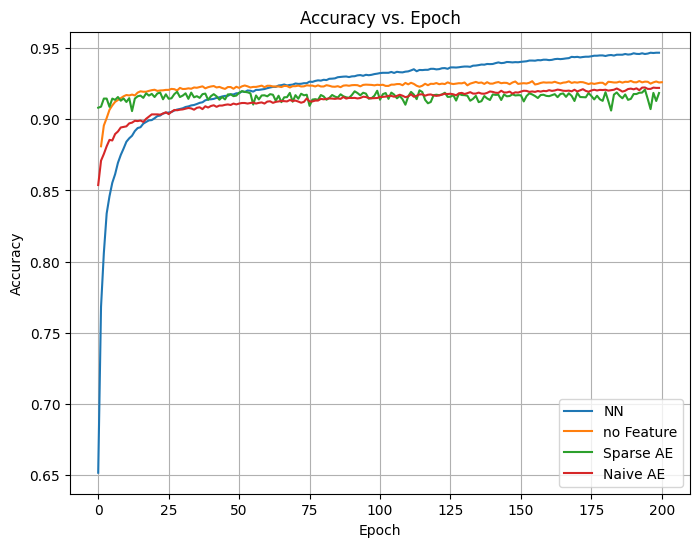

In [189]:
plt.figure(figsize=(8, 6))
plt.plot(history_p3.history['val_accuracy'], label='NN')
plt.plot(df['epoch'], df['acc'], label='no Feature')
plt.plot(sparse_autoencoder_softmax_history.history['val_accuracy'], label='Sparse AE')
plt.plot(naive_autoencoder_softmax_history.history['val_accuracy'], label='Naive AE')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

replicating the graph from the slide and as you can see the result are matching the slides

part4


In [222]:
naive_encoder_model_4 = tf.keras.Sequential(naive_autoencoder.layers[:2])

In [223]:
naive_autoencoder_softmax_4 = tf.keras.models.Sequential([
    naive_encoder_model_4,
    tf.keras.layers.Dense(10, activation="softmax")  # New softmax layer with 10 classes (adjust as needed)
])

# Set the first two layers as non-trainable


In [224]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01)

In [225]:
naive_autoencoder_softmax_4.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [226]:
epochs = 200
# learning rate change and batch size change
naive_autoencoder_softmax_history_4 = naive_autoencoder_softmax_4.fit(train_images_1d, train_labels, epochs=epochs, batch_size = 512,validation_data=(test_images_1d, test_labels))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


118/118 [==============================] - 1s 5ms/step - loss: 1.9023 - accuracy: 0.4765 - val_loss: 1.5860 - val_accuracy: 0.6759
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 1.4209 - accuracy: 0.7152 - val_loss: 1.2441 - val_accuracy: 0.7604
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 1.1641 - accuracy: 0.7695 - val_loss: 1.0505 - val_accuracy: 0.7925
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 1.0114 - accuracy: 0.7913 - val_loss: 0.9288 - val_accuracy: 0.8108
Epoch 5/200
118/118 [==============================] - 0s 3ms/step - loss: 0.9113 - accuracy: 0.8055 - val_loss: 0.8453 - val_accuracy: 0.8215
Epoch 6/200
118/118 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.8148 - val_loss: 0.7854 - val_accuracy: 0.8281
Epoch 7/200
118/118 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.8214 - val_loss: 0.7397 - val_accuracy: 0.8328
Epoch 8/200

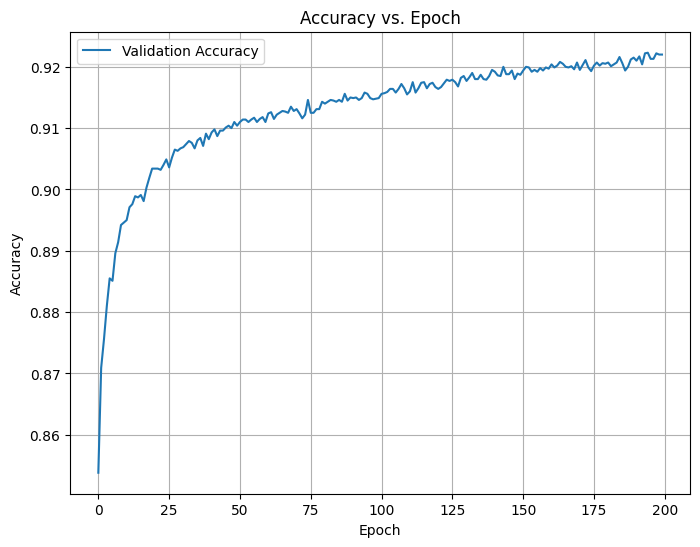

In [227]:
plt.figure(figsize=(8, 6))
plt.plot(naive_autoencoder_softmax_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [228]:
sparse_encoder_model_4 = tf.keras.Sequential(sparse_autoencoder.layers[:2])



In [229]:
sparse_autoencoder_softmax_4 = tf.keras.models.Sequential([
    sparse_encoder_model_4,
    tf.keras.layers.Dense(10, activation="softmax")  # New softmax layer with 10 classes (adjust as needed)
])

# Set the first two layers as non-trainable


In [230]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.6)

In [231]:
sparse_autoencoder_softmax_4.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [232]:
epochs = 200
# learning rate change and batch size change
sparse_autoencoder_softmax_history_4 = sparse_autoencoder_softmax_4.fit(train_images_1d, train_labels, epochs=epochs,batch_size=512, validation_data=(test_images_1d, test_labels))

Epoch 1/200
118/118 [==============================] - 1s 5ms/step - loss: 0.5312 - accuracy: 0.8537 - val_loss: 0.3625 - val_accuracy: 0.9002
Epoch 2/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8969 - val_loss: 0.3404 - val_accuracy: 0.9043
Epoch 3/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.9041 - val_loss: 0.3265 - val_accuracy: 0.9023
Epoch 4/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.9077 - val_loss: 0.3114 - val_accuracy: 0.9087
Epoch 5/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.9094 - val_loss: 0.3020 - val_accuracy: 0.9143
Epoch 6/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.9106 - val_loss: 0.3018 - val_accuracy: 0.9115
Epoch 7/200
118/118 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.9113 - val_loss: 0.2985 - val_accuracy: 0.9121

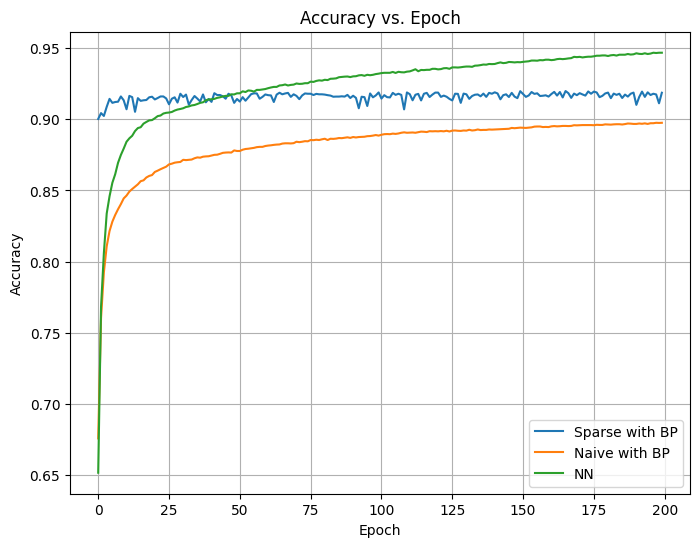

In [233]:
plt.figure(figsize=(8, 6))
plt.plot(sparse_autoencoder_softmax_history_4.history['val_accuracy'], label='Sparse with BP')
plt.plot(naive_autoencoder_softmax_history_4.history['val_accuracy'], label='Naive with BP')
plt.plot(history_p3.history['val_accuracy'], label='NN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

replicating the graphs from the slides and as you can see that after training with using backpropagation you can see the result are similar to that in slides

In [190]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [191]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [192]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [193]:
train_images_1d = train_images.reshape(train_images.shape[0], -1)
test_images_1d = test_images.reshape(test_images.shape[0], -1)

In [194]:
def random_normal(shape, dtype=None):
    return tf.random.normal(shape, mean=0.0, stddev=0.01, dtype=dtype)

In [195]:
# Create a Sequential model and add layers
model_p4_a = tf.keras.Sequential()
model_p4_a.add(tf.keras.layers.Input(shape=(784)))
model_p4_a.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=random_normal))
model_p4_a.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=random_normal))
model_p4_a.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=random_normal))
model_p4_a.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=random_normal))
model_p4_a.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer=random_normal))
model_p4_a.add(tf.keras.layers.Dense(10, activation='softmax'))
model_p4_a.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               401920    
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 512)               262656    
                                                                 
 dense_36 (Dense)            (None, 512)               262656    
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 145

In [196]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01)

In [197]:
model_p4_a.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [198]:
epochs = 50
batch_size = 32
model_p4_a_history = model_p4_a.fit(
    train_images_1d,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 7s 4ms/step - loss: 2.3120 - accuracy: 0.1057 - val_loss: 2.3117 - val_accuracy: 0.1035
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3119 - accuracy: 0.1051 - val_loss: 2.3123 - val_accuracy: 0.1079
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3112 - accuracy: 0.1033 - val_loss: 2.3145 - val_accuracy: 0.0968
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3112 - accuracy: 0.1055 - val_loss: 2.3219 - val_accuracy: 0.1075
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3107 - accuracy: 0.1043 - val_loss: 2.3152 - val_accuracy: 0.0966
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3108 - accuracy: 0.1021 - val_loss: 2.3118 - val_accuracy: 0.0966
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3101 - accuracy: 0.1045 - val_loss: 2.3269 - val_accuracy:

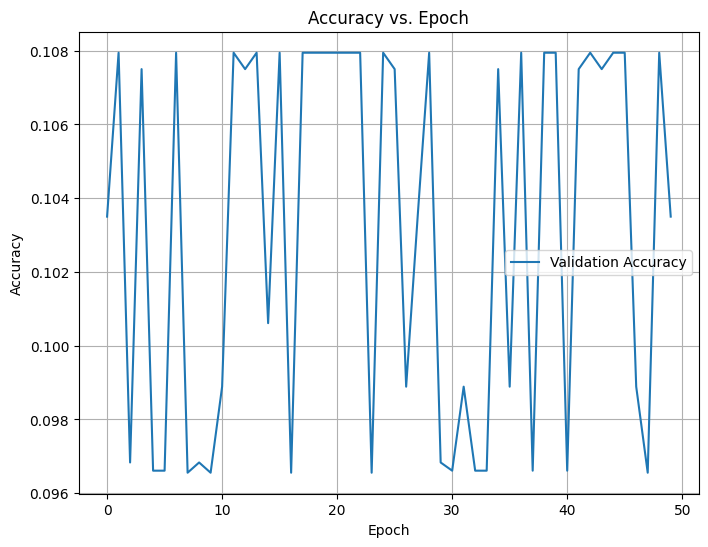

In [199]:
plt.figure(figsize=(8, 6))
plt.plot(model_p4_a_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [200]:
# Create a Sequential model and add layers
model_p4_b = tf.keras.Sequential()
model_p4_b.add(tf.keras.layers.Input(shape=(784)))
model_p4_b.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer="glorot_normal"))
model_p4_b.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer="glorot_normal"))
model_p4_b.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer="glorot_normal"))
model_p4_b.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer="glorot_normal"))
model_p4_b.add(tf.keras.layers.Dense(512, activation="sigmoid", kernel_initializer="glorot_normal"))
model_p4_b.add(tf.keras.layers.Dense(10, activation='softmax'))
model_p4_b.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 512)               262656    
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dense_44 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 145

In [201]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.0001)

In [202]:
model_p4_b.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [203]:
epochs = 50
batch_size = 32
model_p4_b_history = model_p4_b.fit(
    train_images_1d,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 6s 4ms/step - loss: 2.4015 - accuracy: 0.1143 - val_loss: 2.3169 - val_accuracy: 0.1079
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3055 - accuracy: 0.1143 - val_loss: 2.3024 - val_accuracy: 0.1079
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3013 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1079
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy:

In [205]:
# Create a Sequential model and add layers
model_p4_c = tf.keras.Sequential()
model_p4_c.add(tf.keras.layers.Input(shape=(784)))
model_p4_c.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=random_normal))
model_p4_c.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=random_normal))
model_p4_c.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=random_normal))
model_p4_c.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=random_normal))
model_p4_c.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer=random_normal))
model_p4_c.add(tf.keras.layers.Dense(10, activation='softmax'))
model_p4_c.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 512)               262656    
                                                                 
 dense_48 (Dense)            (None, 512)               262656    
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dense_50 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 145

In [206]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.003)

In [207]:
model_p4_c.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [208]:
epochs = 50
batch_size = 32
model_p4_c_history = model_p4_c.fit(
    train_images_1d,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 7s 4ms/step - loss: 2.3018 - accuracy: 0.1140 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3017 - val_accuracy: 0.1079
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3009 - accuracy: 0.1143 - val_loss: 2.3017 - val_accuracy: 0.1079
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3009 - accuracy: 0.1143 - val_loss: 2.3017 - val_accuracy: 0.1079
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3008 - accuracy: 0.1143 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3008 - accuracy: 0.1143 - val_loss: 2.3016 - val_accuracy: 0.1079
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3008 - accuracy: 0.1143 - val_loss: 2.3016 - val_accuracy:

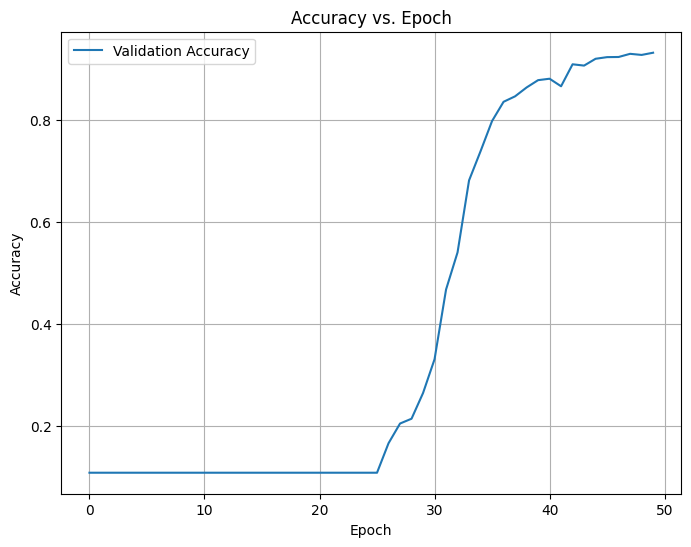

In [209]:
plt.figure(figsize=(8, 6))
plt.plot(model_p4_c_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [210]:
# Create a Sequential model and add layers
model_p4_d = tf.keras.Sequential()
model_p4_d.add(tf.keras.layers.Input(shape=(784)))
model_p4_d.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_p4_d.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_p4_d.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_p4_d.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_p4_d.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_p4_d.add(tf.keras.layers.Dense(10, activation='softmax'))
model_p4_d.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 512)               401920    
                                                                 
 dense_52 (Dense)            (None, 512)               262656    
                                                                 
 dense_53 (Dense)            (None, 512)               262656    
                                                                 
 dense_54 (Dense)            (None, 512)               262656    
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 dense_56 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 145

In [211]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.001)

In [212]:
model_p4_d.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [213]:
epochs = 50
batch_size = 32
model_p4_d_history = model_p4_d.fit(
    train_images_1d,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 7s 4ms/step - loss: 2.2062 - accuracy: 0.4146 - val_loss: 2.0610 - val_accuracy: 0.5988
Epoch 2/50
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6798 - accuracy: 0.6596 - val_loss: 1.2010 - val_accuracy: 0.7453
Epoch 3/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8864 - accuracy: 0.7902 - val_loss: 0.6529 - val_accuracy: 0.8394
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5672 - accuracy: 0.8505 - val_loss: 0.4777 - val_accuracy: 0.8709
Epoch 5/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4484 - accuracy: 0.8773 - val_loss: 0.4019 - val_accuracy: 0.8854
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3887 - accuracy: 0.8914 - val_loss: 0.3594 - val_accuracy: 0.8952
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3522 - accuracy: 0.9001 - val_loss: 0.3334 - val_accuracy:

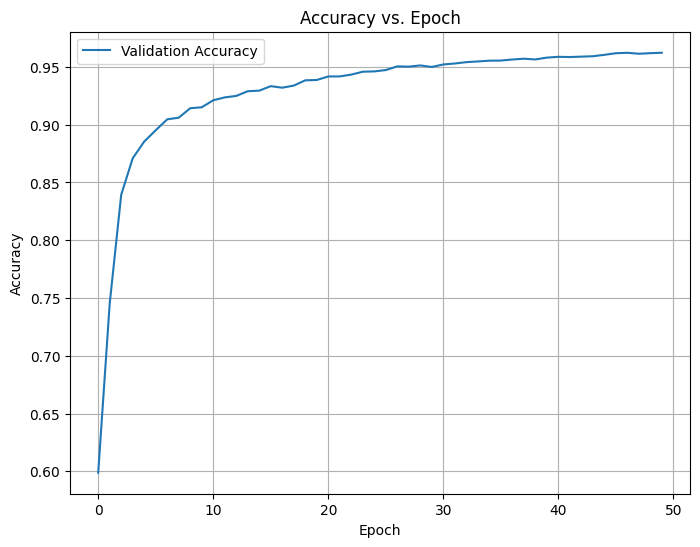

In [214]:
plt.figure(figsize=(8, 6))
plt.plot(model_p4_d_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

In [215]:
# Create a Sequential model and add layers
model_p4_e = tf.keras.Sequential()
model_p4_e.add(tf.keras.layers.Input(shape=(784)))
model_p4_e.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model_p4_e.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model_p4_e.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model_p4_e.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model_p4_e.add(tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal"))
model_p4_e.add(tf.keras.layers.Dense(10, activation='softmax'))
model_p4_e.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 512)               401920    
                                                                 
 dense_58 (Dense)            (None, 512)               262656    
                                                                 
 dense_59 (Dense)            (None, 512)               262656    
                                                                 
 dense_60 (Dense)            (None, 512)               262656    
                                                                 
 dense_61 (Dense)            (None, 512)               262656    
                                                                 
 dense_62 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457674 (5.56 MB)
Trainable params: 145

In [216]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.001)

In [217]:
model_p4_e.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [218]:
epochs = 50
batch_size = 32
model_p4_e_history = model_p4_e.fit(
    train_images_1d,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.4207 - accuracy: 0.6426 - val_loss: 0.6630 - val_accuracy: 0.8463
Epoch 2/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5108 - accuracy: 0.8675 - val_loss: 0.4008 - val_accuracy: 0.8889
Epoch 3/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3745 - accuracy: 0.8952 - val_loss: 0.3316 - val_accuracy: 0.9024
Epoch 4/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3197 - accuracy: 0.9085 - val_loss: 0.2970 - val_accuracy: 0.9123
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2860 - accuracy: 0.9175 - val_loss: 0.2692 - val_accuracy: 0.9203
Epoch 6/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2608 - accuracy: 0.9248 - val_loss: 0.2577 - val_accuracy: 0.9239
Epoch 7/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2414 - accuracy: 0.9300 - val_loss: 0.2409 - val_accuracy:

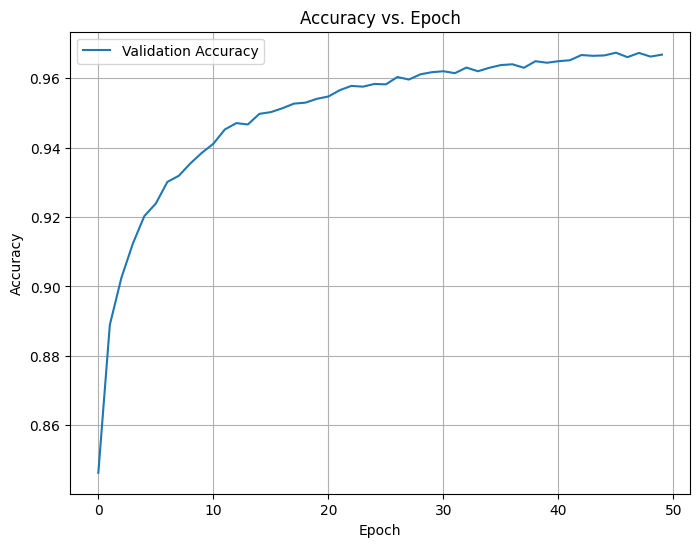

In [219]:
plt.figure(figsize=(8, 6))
plt.plot(model_p4_e_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()

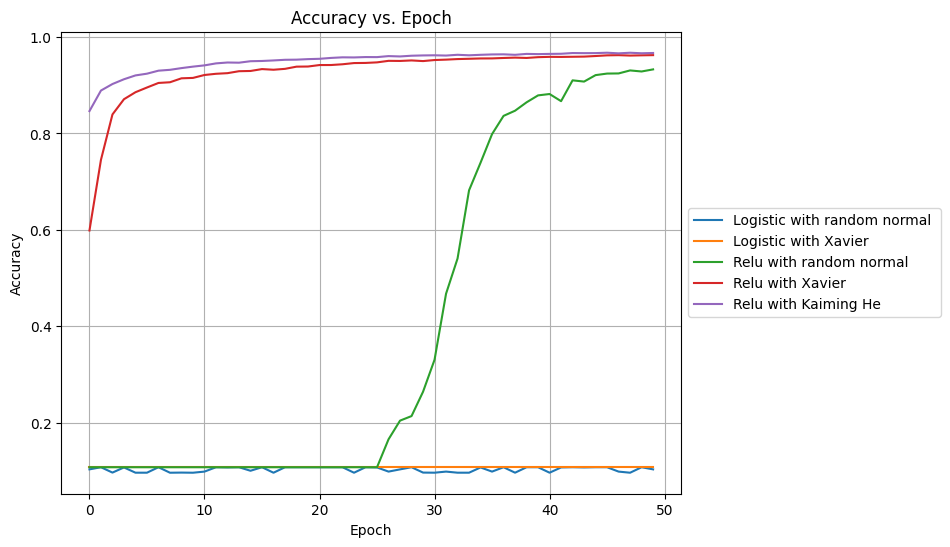

In [220]:
plt.figure(figsize=(8, 6))
plt.plot(model_p4_a_history.history['val_accuracy'], label='Logistic with random normal ')
plt.plot(model_p4_b_history.history['val_accuracy'], label='Logistic with Xavier ')
plt.plot(model_p4_c_history.history['val_accuracy'], label='Relu with random normal ')
plt.plot(model_p4_d_history.history['val_accuracy'], label='Relu with Xavier ')
plt.plot(model_p4_e_history.history['val_accuracy'], label='Relu with Kaiming He ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.show()

relu with he kaiming provides good results and after that relu with xavier
that is expected from the nature of the activation functions
